In [1]:
import sys
sys.path.append('./../../Dataset_custom/hoda')

In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import numpy as np
from HodaDatasetReader import read_hoda_dataset
from scipy import io
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

**Fetch Data**

In [3]:
x_train, y_train = read_hoda_dataset(dataset_path='./../../Dataset_custom/hoda/DigitDB/Train 60000.cdb')
x_test, y_test = read_hoda_dataset(dataset_path='./../../Dataset_custom/hoda/DigitDB/Test 20000.cdb')
x_val, y_val = read_hoda_dataset(dataset_path='./../../Dataset_custom/hoda/DigitDB/RemainingSamples.cdb')

In [4]:
x_train.shape

(60000, 32, 32, 1)

**several sample of dataset**

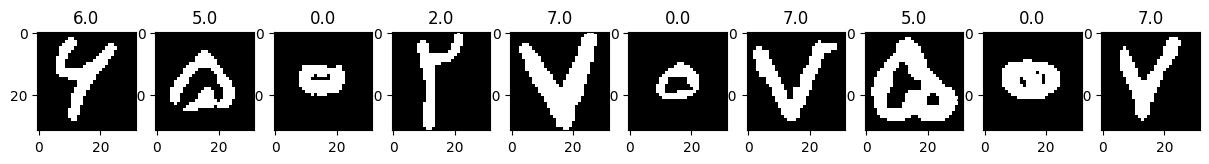

In [5]:
fig, ax = plt.subplots(1, 10, figsize=(15,15))
for i in range(10):
    ax[i].imshow(x_train[i], cmap='gray')
    ax[i].title.set_text(y_train[i])

**Data augmentation**

In [6]:
datagen = ImageDataGenerator(rotation_range=15)

**Normalizing**

In [7]:
x_train, x_test, x_val = x_train/255.0, x_test/255.0, x_val/255.0

**Model**

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 1)),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(512, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.AveragePooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 512)         295424    
                                                                 
 average_pooling2d (AverageP  (None, 3, 3, 512)        0

In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
datagen.fit(x_train)
his = model.fit(datagen.flow(x_train, y_train, batch_size=1024), validation_data=(x_val, y_val), epochs=80, batch_size=1024)

Epoch 1/80
59/59 [==============================] - 16s 190ms/step - loss: 2.1289 - accuracy: 0.2036 - val_loss: 1.1292 - val_accuracy: 0.6487
Epoch 2/80
59/59 [==============================] - 10s 170ms/step - loss: 0.8851 - accuracy: 0.6843 - val_loss: 0.6087 - val_accuracy: 0.7748
Epoch 3/80
59/59 [==============================] - 10s 171ms/step - loss: 0.5604 - accuracy: 0.8130 - val_loss: 0.4077 - val_accuracy: 0.8579
Epoch 4/80
59/59 [==============================] - 10s 170ms/step - loss: 0.4314 - accuracy: 0.8570 - val_loss: 0.3531 - val_accuracy: 0.8717
Epoch 5/80
59/59 [==============================] - 10s 171ms/step - loss: 0.3594 - accuracy: 0.8823 - val_loss: 0.2683 - val_accuracy: 0.9083
Epoch 6/80
59/59 [==============================] - 10s 169ms/step - loss: 0.2948 - accuracy: 0.9059 - val_loss: 0.2152 - val_accuracy: 0.9256
Epoch 7/80
59/59 [==============================] - 10s 169ms/step - loss: 0.2497 - accuracy: 0.9188 - val_loss: 0.1933 - val_accuracy: 0.9336

In [12]:
model.evaluate(x_test, y_test)

625/625 [==============================] - 2s 3ms/step - loss: 0.0293 - accuracy: 0.9916


[0.029268594458699226, 0.9915500283241272]

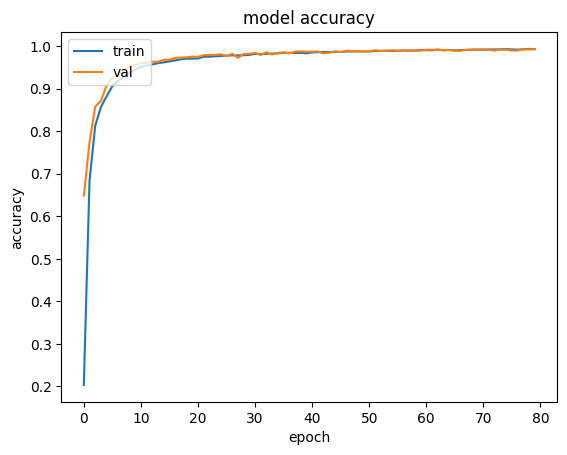

In [13]:
plt.plot(his.history['accuracy'])
plt.plot(his.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()